In [1]:


import zipfile

def extract_zip(zip_file_path, extract_path):
  """Extracts a zip file to a specified directory.

  Args:
    zip_file_path: The path to the zip file.
    extract_path: The directory to extract the contents to.
  """
  with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


# Example usage
zip_file_path = '/content/archive.zip'  # Replace with the actual path to your zip file
extract_path = '/content/' # Replace with desired extraction path

extract_zip(zip_file_path, extract_path)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
df = pd.read_csv("/content/Top250.csv")
df.head()

,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category
0,1,McDonald's,NaN,40412,4.9%,13846,-0.5%,NaN,Quick Service & Burger
1,2,Starbucks,NaN,21380,8.6%,15049,3.0%,NaN,Quick Service & Coffee Cafe
2,3,Chick-fil-A,While Popeyes got a lot of the chicken buzz in...,11320,13.0%,2470,5.0%,NaN,Quick Service & Chicken
3,4,Taco Bell,NaN,11293,9.0%,6766,2.7%,NaN,Quick Service & Mexican
4,5,Burger King,NaN,10204,2.7%,7346,0.2%,NaN,Quick Service & Burger


In [5]:
df.shape

(250, 9)

In [6]:
df.isnull().sum()

,0
Rank,0
Restaurant,0
Content,217
Sales,0
YOY_Sales,0
Units,0
YOY_Units,0
Headquarters,198
Segment_Category,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rank              250 non-null    int64 
 1   Restaurant        250 non-null    object
 2   Content           33 non-null     object
 3   Sales             250 non-null    int64 
 4   YOY_Sales         250 non-null    object
 5   Units             250 non-null    int64 
 6   YOY_Units         250 non-null    object
 7   Headquarters      52 non-null     object
 8   Segment_Category  250 non-null    object
dtypes: int64(3), object(6)
memory usage: 17.7+ KB


In [8]:
df.describe()

,Rank,Sales,Units
count,250.000000,250.00000,250.000000
mean,125.500000,1242.74000,850.076000
std,72.312977,3365.22882,2296.151659
min,1.000000,126.00000,13.000000
25%,63.250000,181.00000,85.000000
50%,125.500000,330.00000,207.000000
75%,187.750000,724.75000,555.250000
max,250.000000,40412.00000,23801.000000


In [9]:
# Data Processing
df_cleaned = df.copy()

# Convert percentage columns to numeric values
df_cleaned["YOY_Sales"] = df_cleaned["YOY_Sales"].str.replace("%", "").astype(float)
df_cleaned["YOY_Units"] = df_cleaned["YOY_Units"].str.replace("%", "").astype(float)

# Feature Extraction
df_cleaned["Popularity_Score"] = (df_cleaned["Sales"] * (1 + df_cleaned["YOY_Sales"] / 100)) / df_cleaned["Units"]
df_cleaned["Total_Sales_Contribution"] = df_cleaned.groupby("Segment_Category")["Sales"].transform(lambda x: x / x.sum())
df_cleaned["Growth_Rate"] = df_cleaned["YOY_Sales"] / df_cleaned["YOY_Units"]

# Display extracted features
df_cleaned[["Restaurant", "Popularity_Score", "Total_Sales_Contribution", "Growth_Rate"]].head()


,Restaurant,Popularity_Score,Total_Sales_Contribution,Growth_Rate
0,McDonald's,3.061692,0.509070,-9.800000
1,Starbucks,1.542872,0.670451,2.866667
2,Chick-fil-A,5.178785,0.500464,2.600000
3,Taco Bell,1.819298,0.930001,3.333333
4,Burger King,1.426560,0.128540,13.500000


<ipython-input-10-947337c2e2e5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Popularity_Score", y="Restaurant", data=top_10_popularity, ax=axes[0], palette="Blues_r")
<ipython-input-10-947337c2e2e5>:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


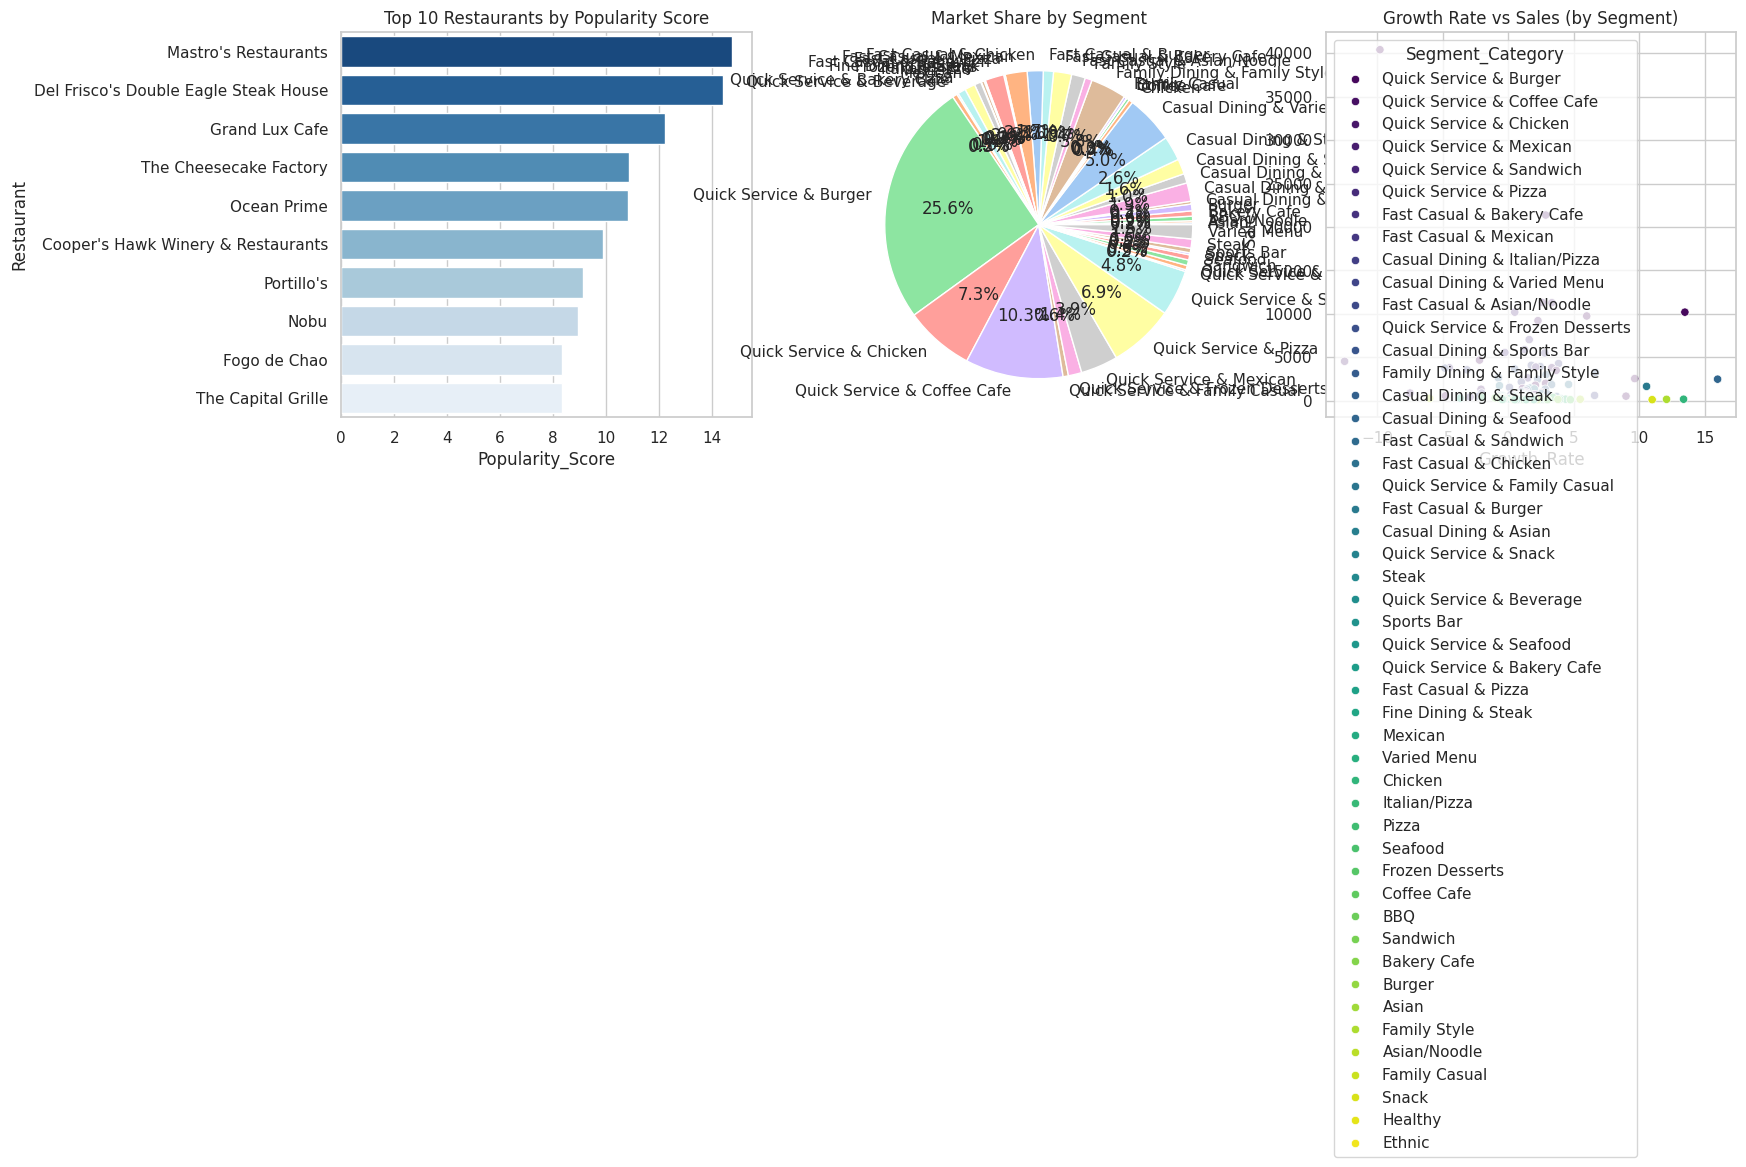

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1️⃣ Bar Chart - Popularity Score (Top 10 Restaurants)
top_10_popularity = df_cleaned.nlargest(10, "Popularity_Score")
sns.barplot(x="Popularity_Score", y="Restaurant", data=top_10_popularity, ax=axes[0], palette="Blues_r")
axes[0].set_title("Top 10 Restaurants by Popularity Score")

# 2️⃣ Pie Chart - Total Sales Contribution by Segment
sales_by_segment = df_cleaned.groupby("Segment_Category")["Sales"].sum()
axes[1].pie(sales_by_segment, labels=sales_by_segment.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
axes[1].set_title("Market Share by Segment")

# 3️⃣ Scatter Plot - Growth Rate vs. Sales
sns.scatterplot(x="Growth_Rate", y="Sales", data=df_cleaned, ax=axes[2], hue="Segment_Category", palette="viridis")
axes[2].set_title("Growth Rate vs Sales (by Segment)")

# Show the plots
plt.tight_layout()
plt.show()


<ipython-input-11-9e34d6cdf1c3>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Revenue_Per_Unit", y="Restaurant", data=top_10_rpu, ax=axes[0, 0], palette="coolwarm")
<ipython-input-11-9e34d6cdf1c3>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Segment_Category", y="Avg_Sales_Per_Segment", data=df_cleaned, ax=axes[1, 0], palette="Set2")
<ipython-input-11-9e34d6cdf1c3>:49: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


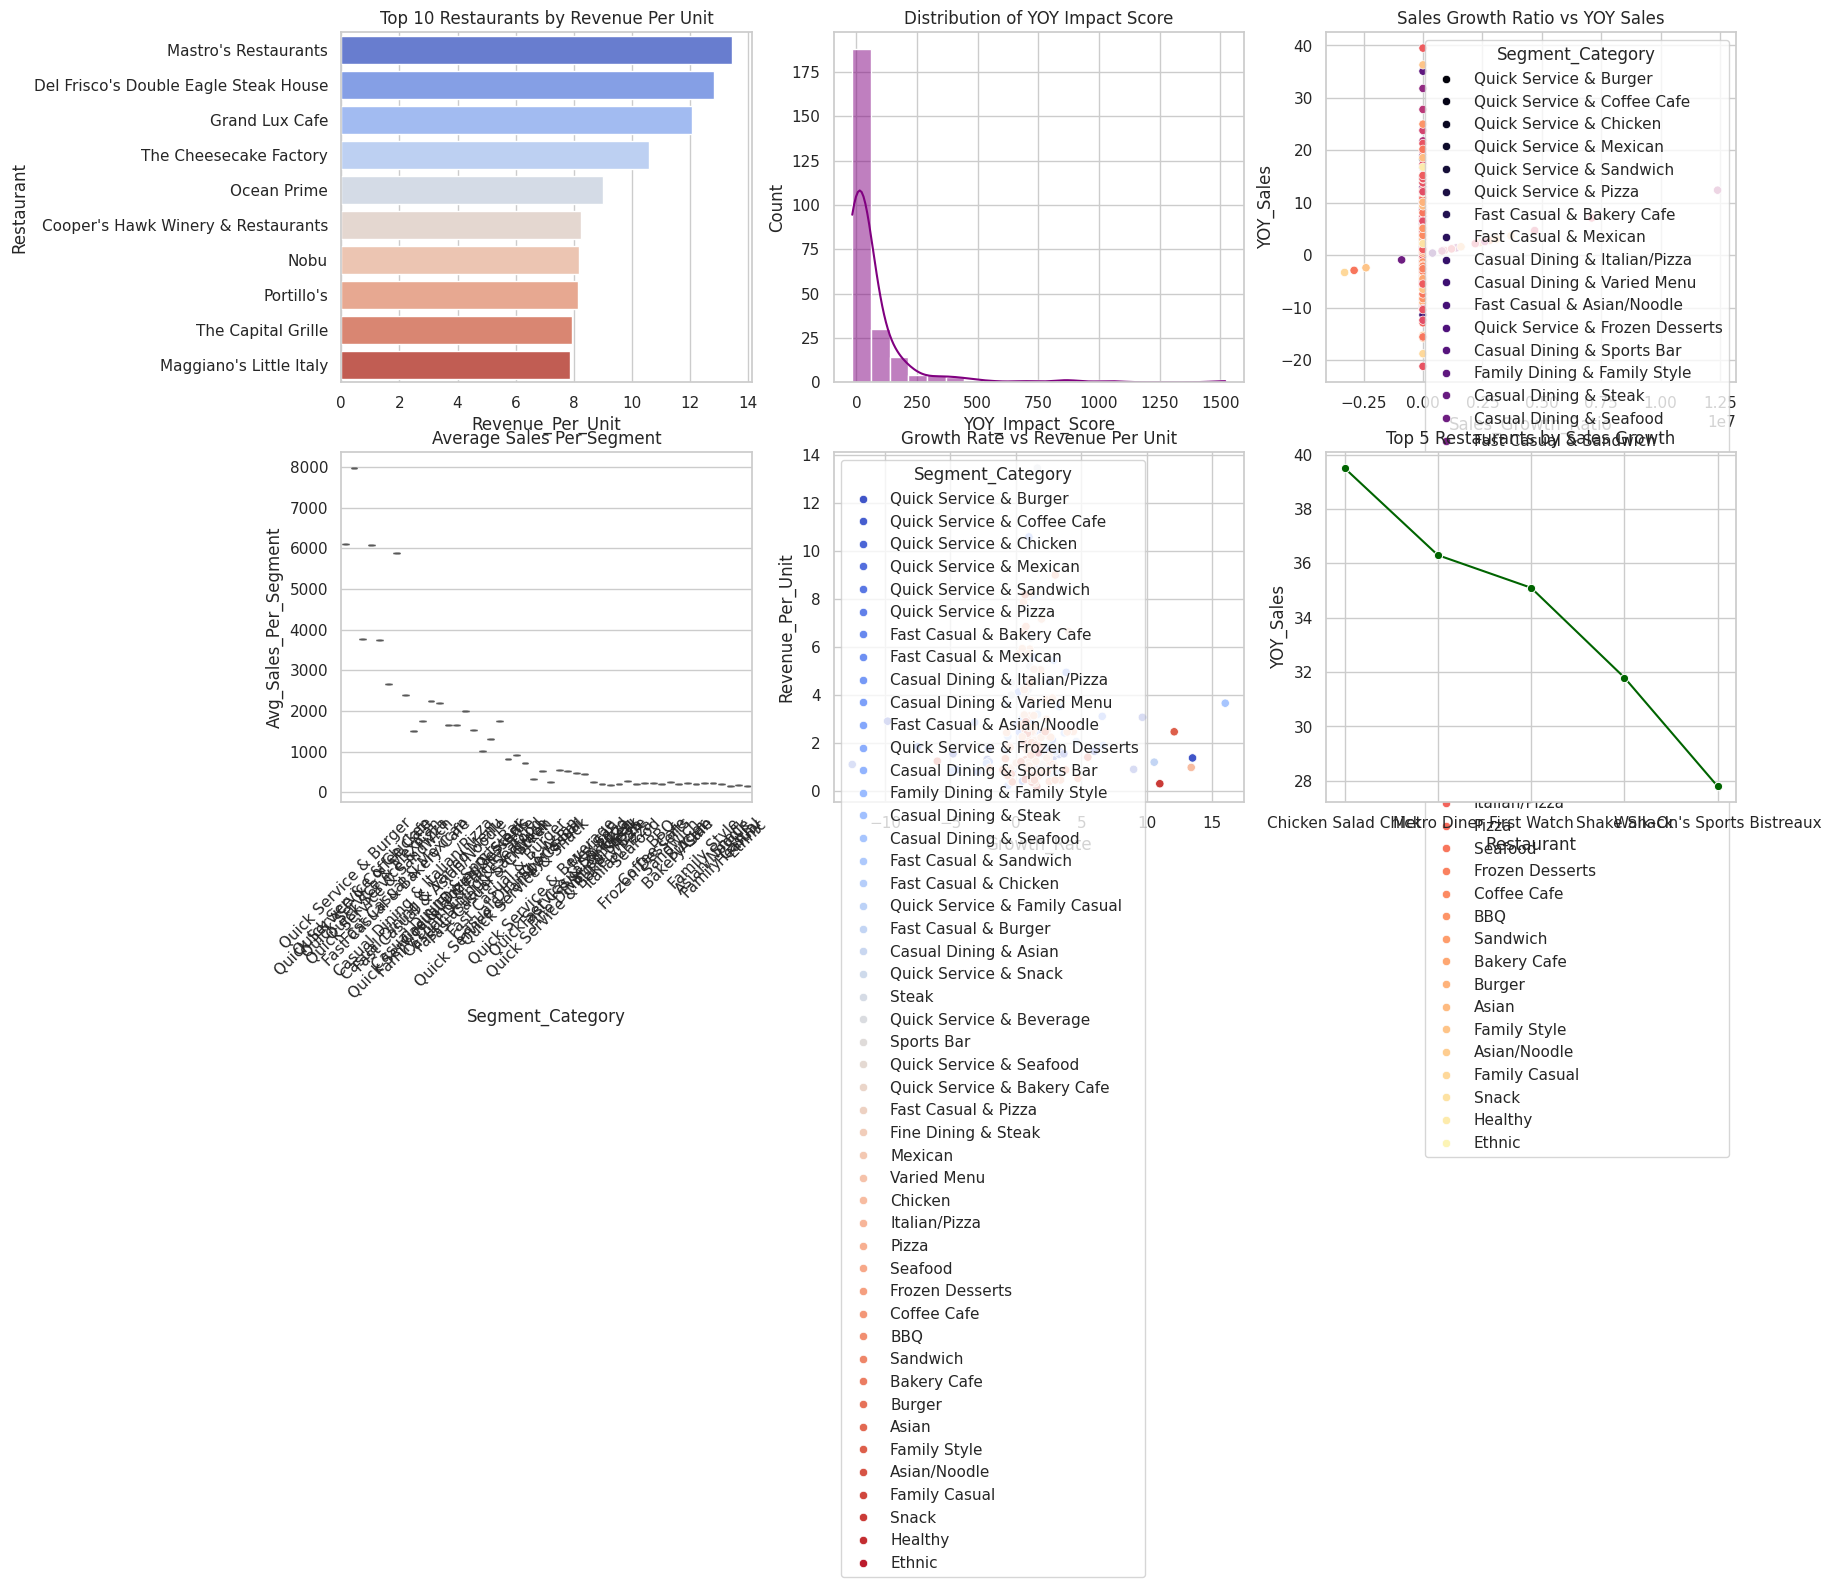

In [11]:
# Additional Feature Extraction

# 1️⃣ Revenue Per Unit (RPU) - Sales per Restaurant Unit
df_cleaned["Revenue_Per_Unit"] = df_cleaned["Sales"] / df_cleaned["Units"]

# 2️⃣ Sales Per Square Foot (if Area was given, but we assume constant for now)
# df_cleaned["Sales_Per_SqFt"] = df_cleaned["Sales"] / df_cleaned["Total_Area"]  # Uncomment if area data is available

# 3️⃣ YOY Growth Impact Score - Combination of YOY Sales and YOY Units
df_cleaned["YOY_Impact_Score"] = df_cleaned["YOY_Sales"] * df_cleaned["YOY_Units"]

# 4️⃣ Average Sales per Segment
df_cleaned["Avg_Sales_Per_Segment"] = df_cleaned.groupby("Segment_Category")["Sales"].transform("mean")

# 5️⃣ Sales Growth Ratio - How much Sales is growing compared to Units
df_cleaned["Sales_Growth_Ratio"] = df_cleaned["YOY_Sales"] / (df_cleaned["YOY_Units"] + 1e-6)  # Avoid division by zero

# Plotting

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1️⃣ Revenue Per Unit (Top 10 Restaurants)
top_10_rpu = df_cleaned.nlargest(10, "Revenue_Per_Unit")
sns.barplot(x="Revenue_Per_Unit", y="Restaurant", data=top_10_rpu, ax=axes[0, 0], palette="coolwarm")
axes[0, 0].set_title("Top 10 Restaurants by Revenue Per Unit")

# 2️⃣ YOY Impact Score Distribution
sns.histplot(df_cleaned["YOY_Impact_Score"], bins=20, kde=True, ax=axes[0, 1], color="purple")
axes[0, 1].set_title("Distribution of YOY Impact Score")

# 3️⃣ Sales Growth Ratio vs YOY Sales
sns.scatterplot(x="Sales_Growth_Ratio", y="YOY_Sales", data=df_cleaned, hue="Segment_Category", ax=axes[0, 2], palette="magma")
axes[0, 2].set_title("Sales Growth Ratio vs YOY Sales")

# 4️⃣ Average Sales Per Segment (Boxplot)
sns.boxplot(x="Segment_Category", y="Avg_Sales_Per_Segment", data=df_cleaned, ax=axes[1, 0], palette="Set2")
axes[1, 0].set_title("Average Sales Per Segment")
axes[1, 0].tick_params(axis="x", rotation=45)

# 5️⃣ Growth Rate vs Revenue Per Unit
sns.scatterplot(x="Growth_Rate", y="Revenue_Per_Unit", data=df_cleaned, hue="Segment_Category", ax=axes[1, 1], palette="coolwarm")
axes[1, 1].set_title("Growth Rate vs Revenue Per Unit")

# 6️⃣ Sales Growth Trend (Line Chart for Top 5 Restaurants)
top_5_sales_growth = df_cleaned.nlargest(5, "YOY_Sales")
sns.lineplot(x=top_5_sales_growth["Restaurant"], y=top_5_sales_growth["YOY_Sales"], marker="o", ax=axes[1, 2], color="darkgreen")
axes[1, 2].set_title("Top 5 Restaurants by Sales Growth")

plt.tight_layout()
plt.show()


<ipython-input-16-3b8deeec2375>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sales", y="Restaurant", data=top_10_sales, ax=axes[0, 0], palette="Blues_r")
<ipython-input-16-3b8deeec2375>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Segment_Category", y="Profitability_Ratio", data=df_cleaned, ax=axes[1, 1], palette="Set2")
<ipython-input-16-3b8deeec2375>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Profitability_Ratio", y="Restaurant", data=top_10_profitability, ax=axes[2, 1], palette="coolwarm")


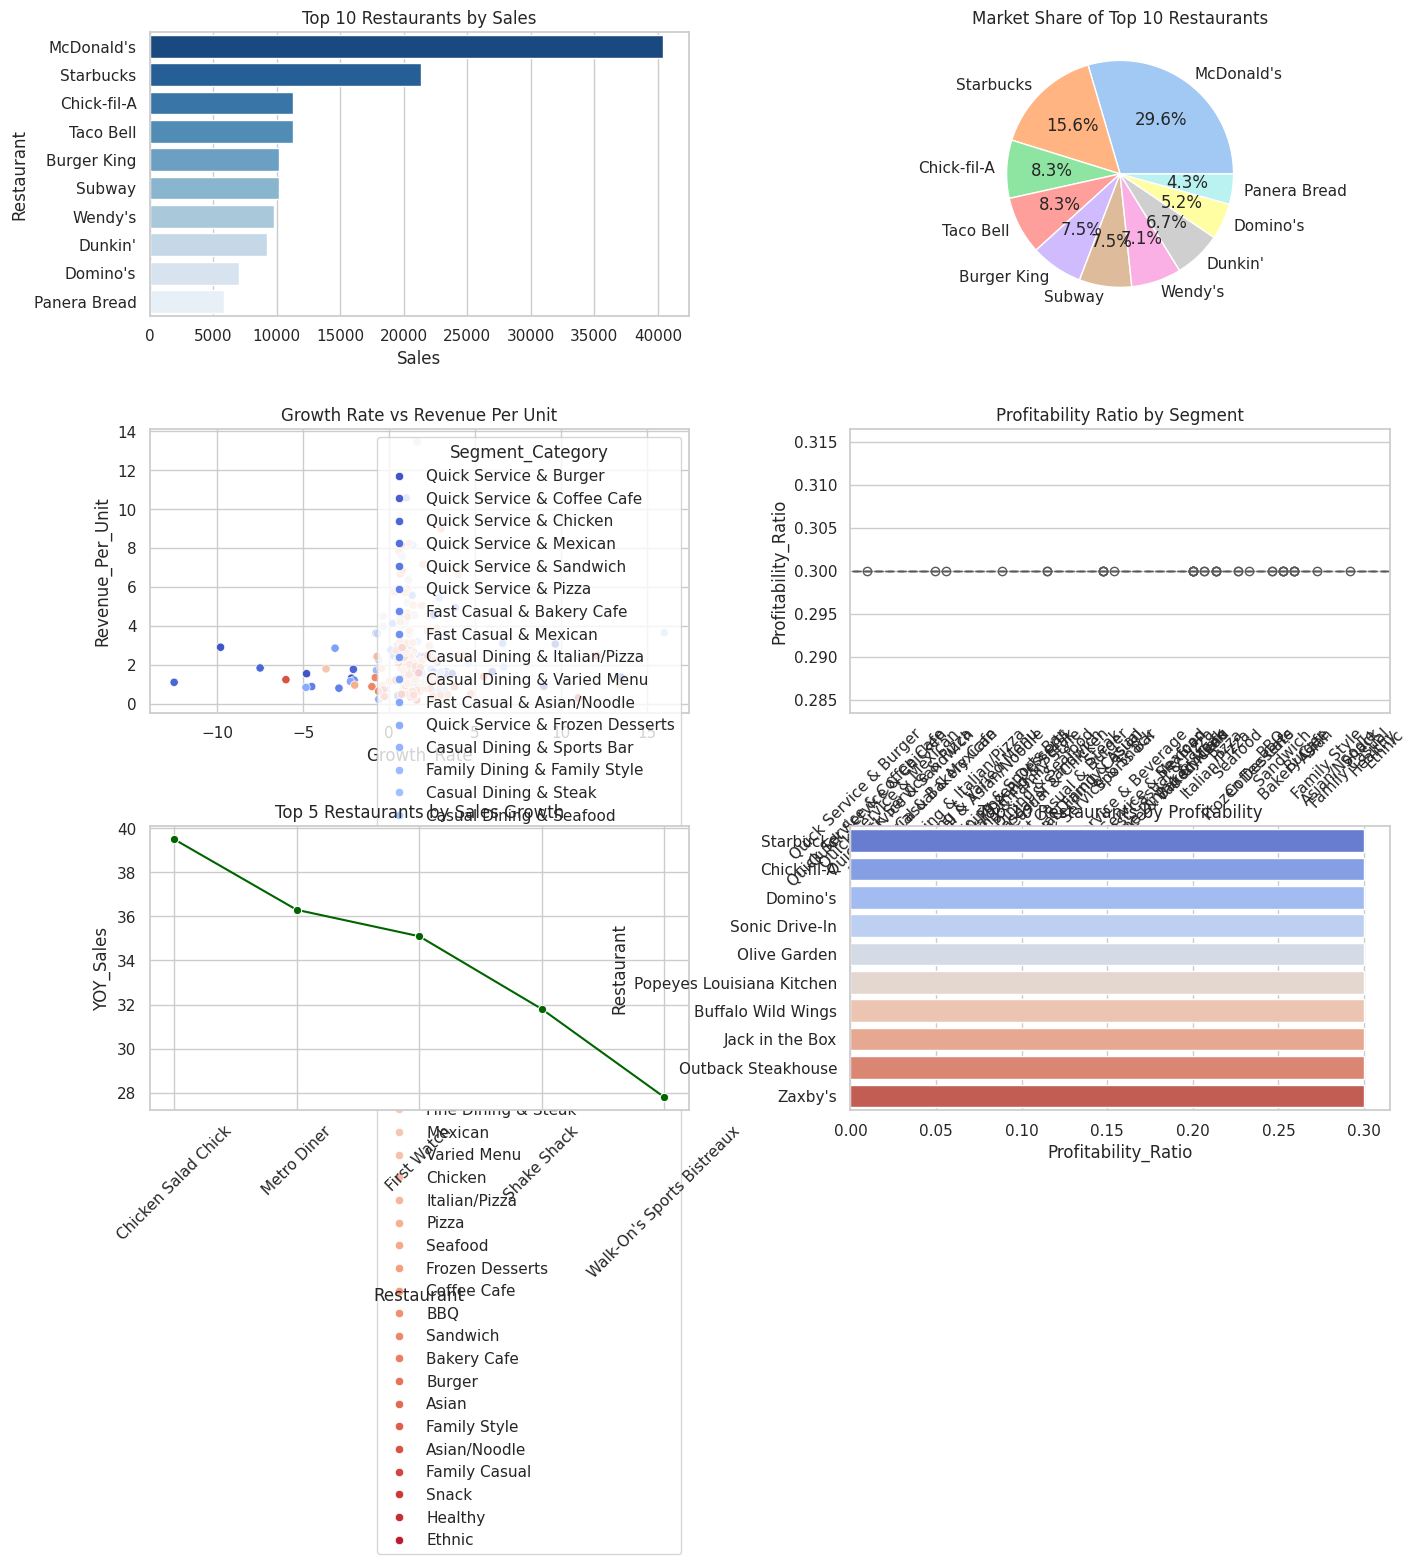

In [16]:
# Feature Extraction with Additional Metrics

# 1️⃣ Market Share (%) - Percentage contribution of each restaurant's sales to total sales
df_cleaned["Market_Share"] = (df_cleaned["Sales"] / df_cleaned["Sales"].sum()) * 100

# 2️⃣ Profitability Ratio (Assuming Expenses = 70% of Sales for Estimation)
df_cleaned["Profitability_Ratio"] = (df_cleaned["Sales"] - (df_cleaned["Sales"] * 0.7)) / df_cleaned["Sales"]

# Sorting for better visualization
top_10_sales = df_cleaned.nlargest(10, "Sales")
top_10_market_share = df_cleaned.nlargest(10, "Market_Share")
top_10_profitability = df_cleaned.nlargest(10, "Profitability_Ratio")

# Set up a structured plot layout
fig, axes = plt.subplots(3, 2, figsize=(16, 14))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# 1️⃣ Bar Plot - Top 10 Restaurants by Sales
sns.barplot(x="Sales", y="Restaurant", data=top_10_sales, ax=axes[0, 0], palette="Blues_r")
axes[0, 0].set_title("Top 10 Restaurants by Sales")

# 2️⃣ Pie Chart - Market Share Distribution
axes[0, 1].pie(top_10_market_share["Market_Share"], labels=top_10_market_share["Restaurant"], autopct='%1.1f%%', colors=sns.color_palette("pastel"))
axes[0, 1].set_title("Market Share of Top 10 Restaurants")

# 3️⃣ Scatter Plot - Growth Rate vs Revenue Per Unit
sns.scatterplot(x="Growth_Rate", y="Revenue_Per_Unit", data=df_cleaned, hue="Segment_Category", ax=axes[1, 0], palette="coolwarm")
axes[1, 0].set_title("Growth Rate vs Revenue Per Unit")


# 4️⃣ Boxplot - Profitability Ratio Across Segments
sns.boxplot(x="Segment_Category", y="Profitability_Ratio", data=df_cleaned, ax=axes[1, 1], palette="Set2")
axes[1, 1].set_title("Profitability Ratio by Segment")
axes[1, 1].tick_params(axis="x", rotation=45)

# 5️⃣ Line Chart - Sales Growth Trend of Top 5 Restaurants
top_5_sales_growth = df_cleaned.nlargest(5, "YOY_Sales")
sns.lineplot(x=top_5_sales_growth["Restaurant"], y=top_5_sales_growth["YOY_Sales"], marker="o", ax=axes[2, 0], color="darkgreen")
axes[2, 0].set_title("Top 5 Restaurants by Sales Growth")
axes[2, 0].tick_params(axis="x", rotation=45)

# 6️⃣ Bar Plot - Profitability of Top 10 Restaurants
sns.barplot(x="Profitability_Ratio", y="Restaurant", data=top_10_profitability, ax=axes[2, 1], palette="coolwarm")
axes[2, 1].set_title("Top 10 Restaurants by Profitability")

# Show the final plots
plt.show()



<ipython-input-15-25033517fb2d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Segment_Category", y="Profitability_Ratio", data=df_cleaned, ax=axes[1, 1], palette="Set2")
<ipython-input-15-25033517fb2d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Profitability_Ratio", y="Restaurant", data=top_10_profitability, ax=axes[2, 1], palette="coolwarm")


<ipython-input-17-0838ef5e7580>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sales", y="Restaurant", data=top_10_sales, palette="Blues_r")


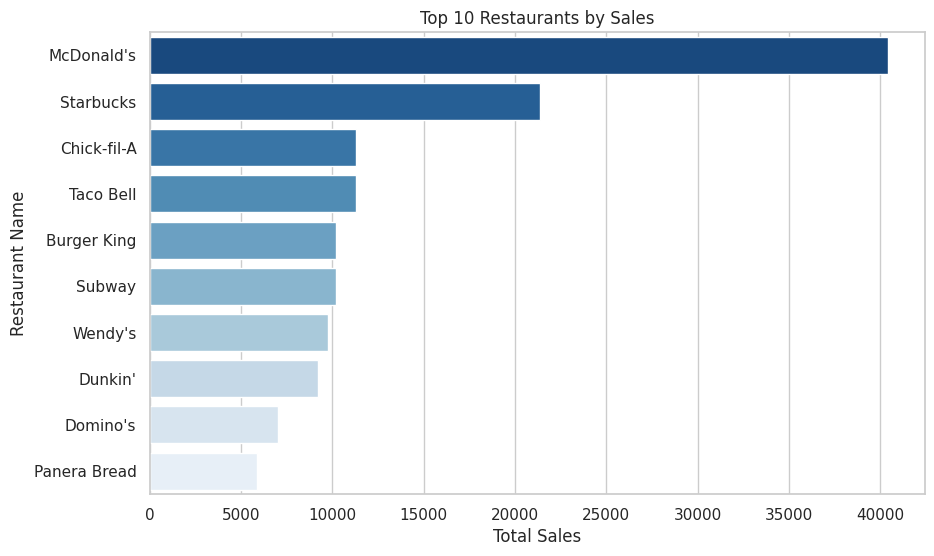

In [17]:
# Plot 1: Top 10 Restaurants by Sales

plt.figure(figsize=(10, 6))
sns.barplot(x="Sales", y="Restaurant", data=top_10_sales, palette="Blues_r")
plt.title("Top 10 Restaurants by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Restaurant Name")
plt.show()


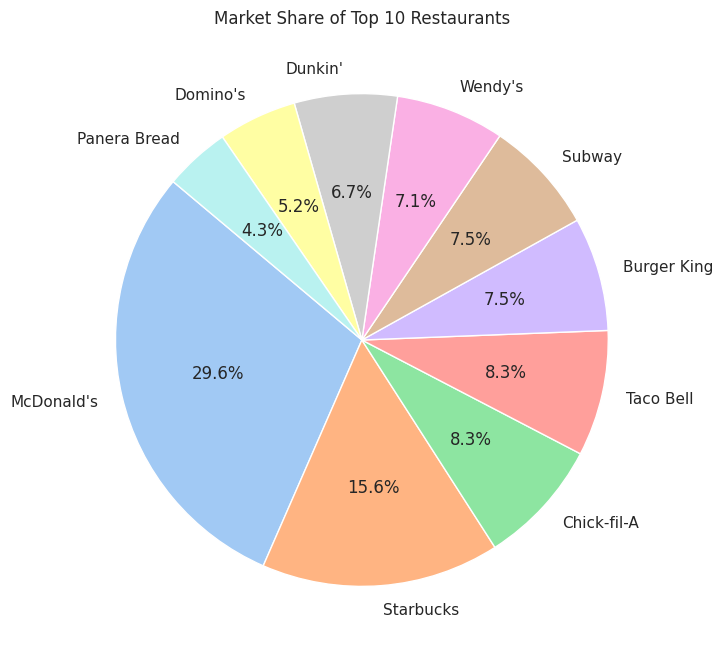

In [18]:
# Plot 2: Market Share Pie Chart

plt.figure(figsize=(8, 8))
plt.pie(top_10_market_share["Market_Share"], labels=top_10_market_share["Restaurant"], autopct='%1.1f%%', colors=sns.color_palette("pastel"), startangle=140)
plt.title("Market Share of Top 10 Restaurants")
plt.show()


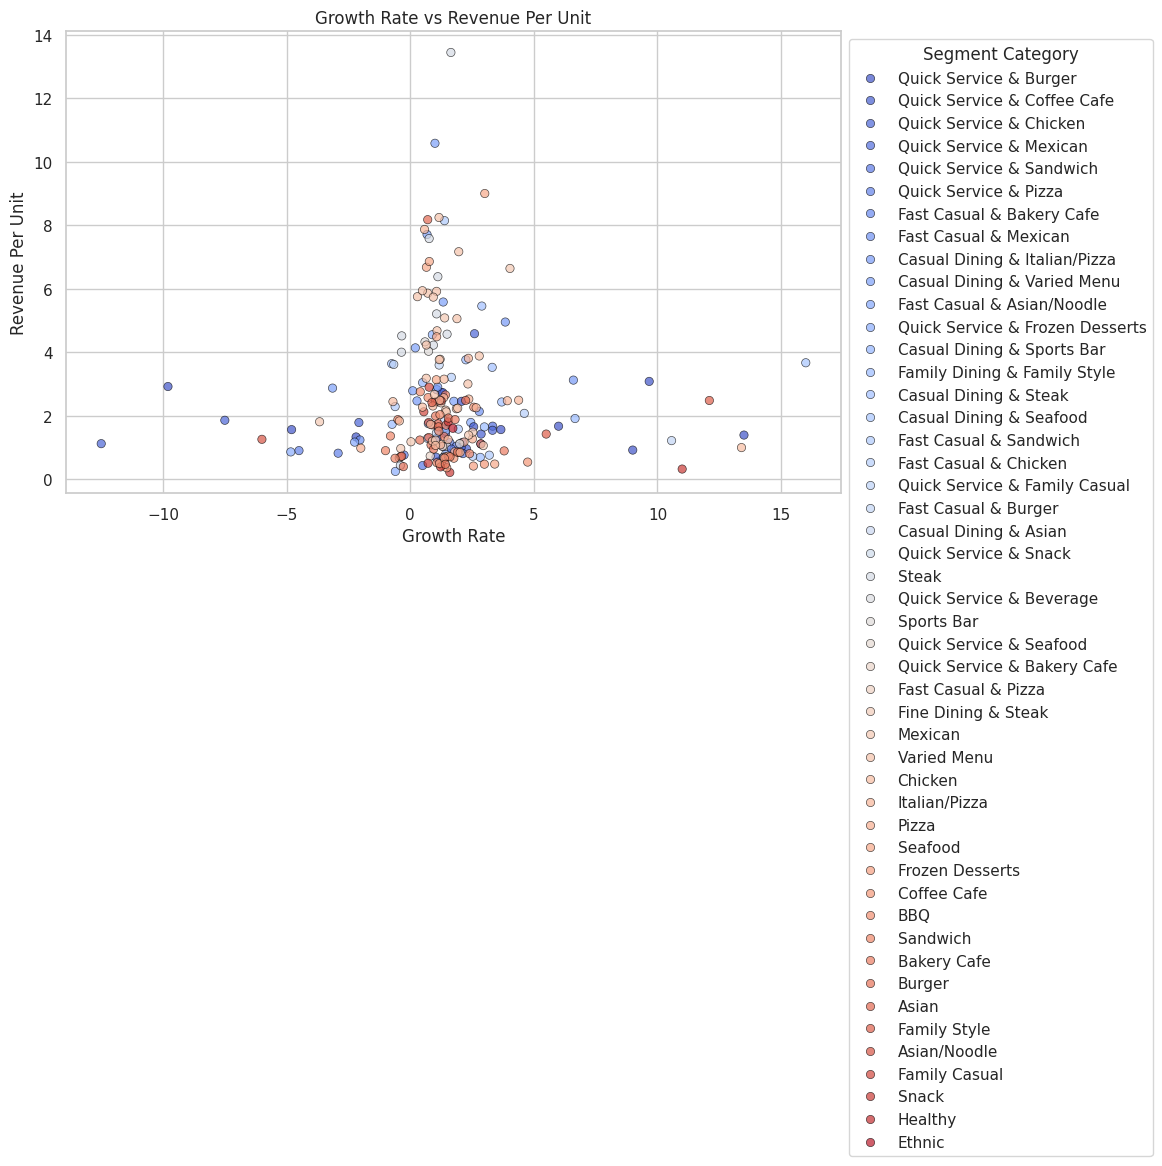

In [19]:
# Plot 3: Growth Rate vs Revenue Per Unit

plt.figure(figsize=(10, 6))
sns.scatterplot(x="Growth_Rate", y="Revenue_Per_Unit", data=df_cleaned, hue="Segment_Category", palette="coolwarm", alpha=0.7, edgecolor="black")
plt.title("Growth Rate vs Revenue Per Unit")
plt.xlabel("Growth Rate")
plt.ylabel("Revenue Per Unit")
plt.legend(title="Segment Category", bbox_to_anchor=(1, 1))
plt.show()


<ipython-input-23-62d8a53f6fe3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Segment_Category", y="Profitability_Ratio", data=df_cleaned, palette="Set2")


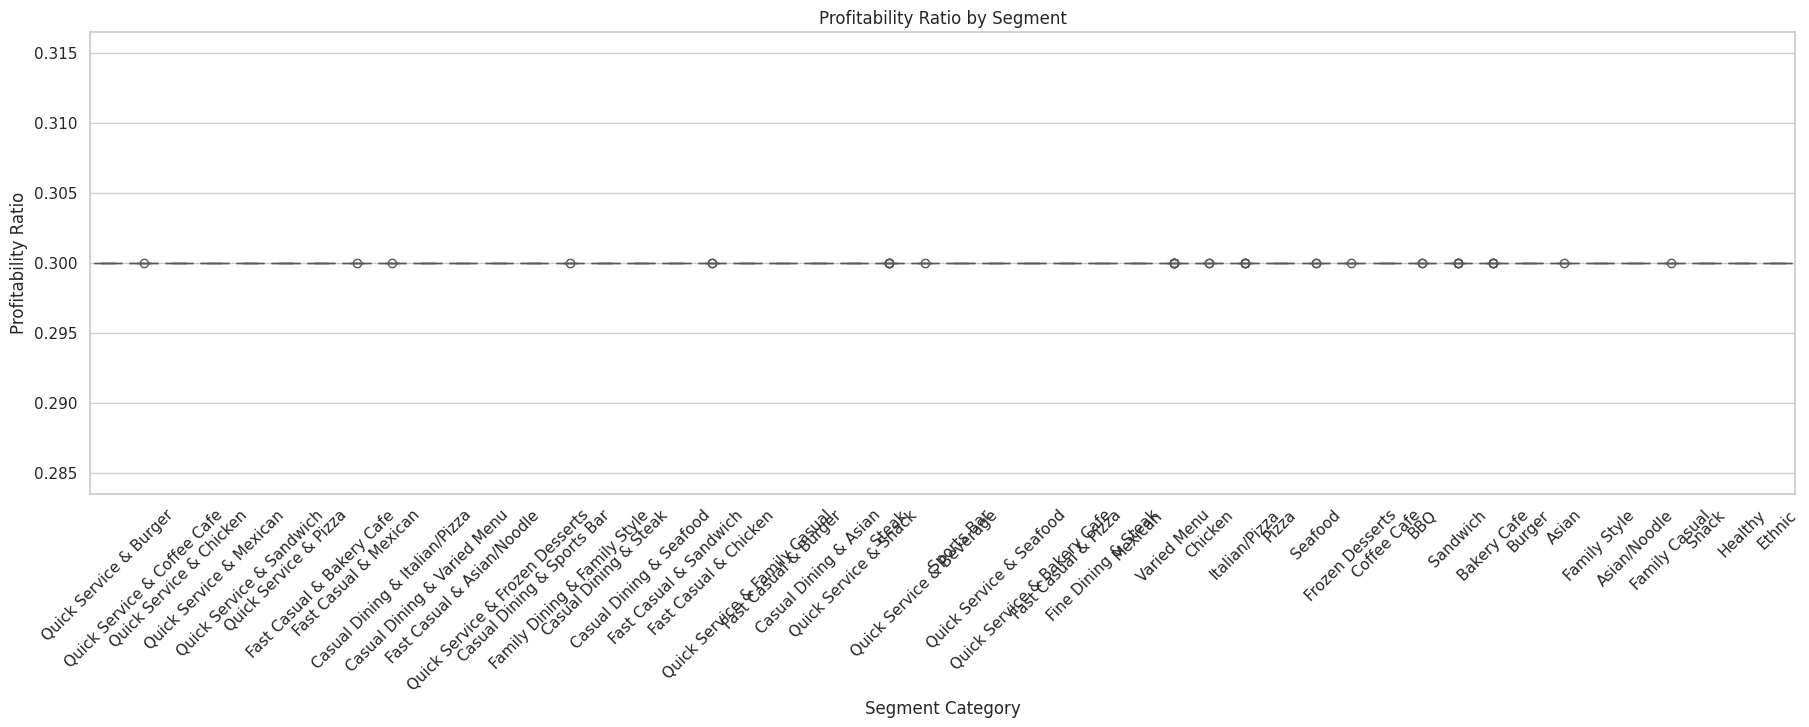

In [23]:
# Plot 4: Profitability Ratio by Segment (Boxplot)

plt.figure(figsize=(22, 6))
sns.boxplot(x="Segment_Category", y="Profitability_Ratio", data=df_cleaned, palette="Set2")
plt.title("Profitability Ratio by Segment")
plt.xlabel("Segment Category")
plt.ylabel("Profitability Ratio")
plt.xticks(rotation=45)
plt.show()


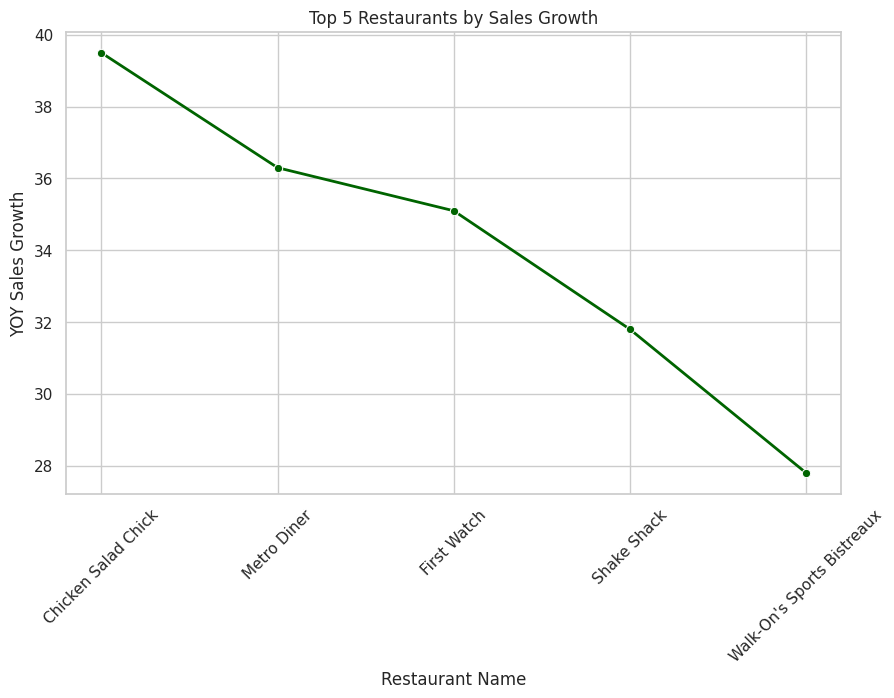

In [25]:
# Plot 5: Sales Growth Trend of Top 5 Restaurants

plt.figure(figsize=(10, 6))
sns.lineplot(x=top_5_sales_growth["Restaurant"], y=top_5_sales_growth["YOY_Sales"], marker="o", color="darkgreen", linewidth=2)
plt.title("Top 5 Restaurants by Sales Growth")
plt.xlabel("Restaurant Name")
plt.ylabel("YOY Sales Growth")
plt.xticks(rotation=45)
plt.show()


<ipython-input-26-f0794dfdf776>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Profitability_Ratio", y="Restaurant", data=top_10_profitability, palette="coolwarm")


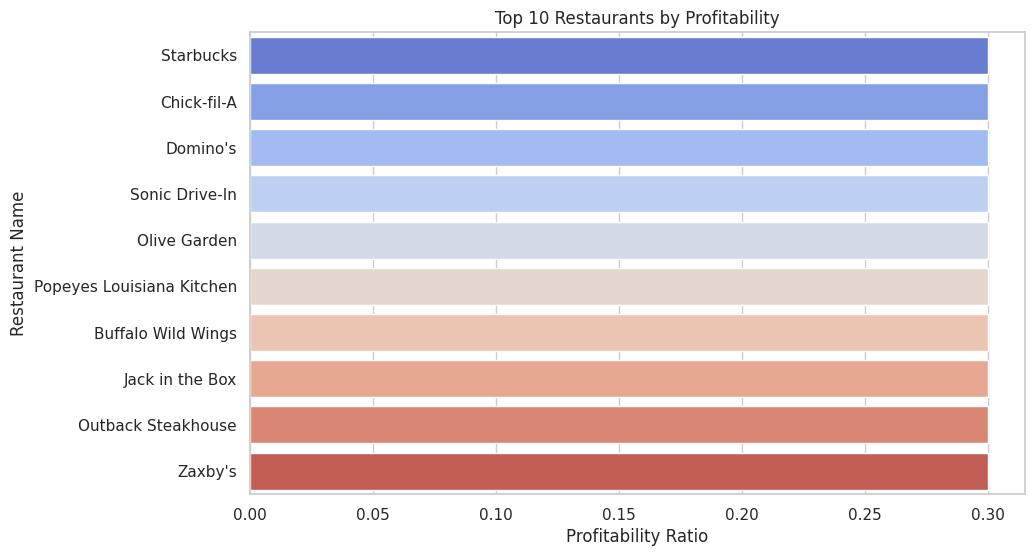

In [26]:
# Plot 6: Top 10 Restaurants by Profitability

plt.figure(figsize=(10, 6))
sns.barplot(x="Profitability_Ratio", y="Restaurant", data=top_10_profitability, palette="coolwarm")
plt.title("Top 10 Restaurants by Profitability")
plt.xlabel("Profitability Ratio")
plt.ylabel("Restaurant Name")
plt.show()


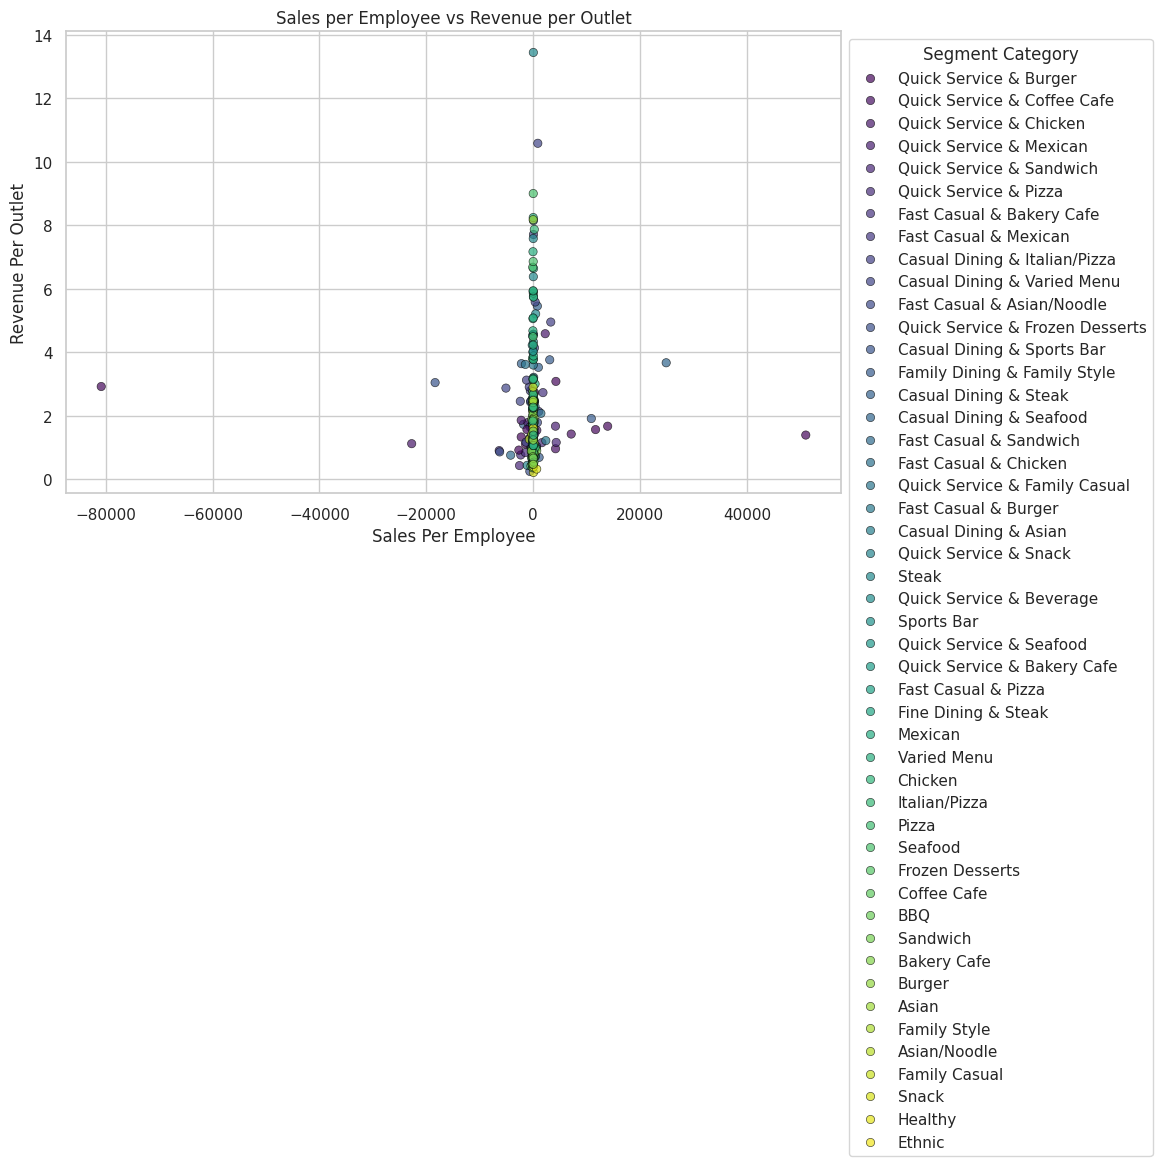

In [27]:
# Corrected Feature Extraction using 'Units' instead of 'Total_Units'
df_cleaned["Revenue_Per_Outlet"] = df_cleaned["Sales"] / df_cleaned["Units"]
df_cleaned["Sales_Per_Employee"] = df_cleaned["Sales"] / df_cleaned["YOY_Units"]  # Assuming YOY_Units represents employees
df_cleaned["Employee_Efficiency_Score"] = (df_cleaned["Sales_Per_Employee"] * df_cleaned["Profitability_Ratio"])
df_cleaned["Market_Growth_Contribution"] = (df_cleaned["YOY_Sales"] / df_cleaned["Sales"]) * 100

# Plot 7: Sales per Outlet vs Sales per Employee (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Sales_Per_Employee", y="Revenue_Per_Outlet", data=df_cleaned, hue="Segment_Category", palette="viridis", alpha=0.7, edgecolor="black")
plt.title("Sales per Employee vs Revenue per Outlet")
plt.xlabel("Sales Per Employee")
plt.ylabel("Revenue Per Outlet")
plt.legend(title="Segment Category", bbox_to_anchor=(1, 1))
plt.show()


<ipython-input-29-c44ced53b064>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Segment_Category", y="Employee_Efficiency_Score", data=df_cleaned, palette="Set2")


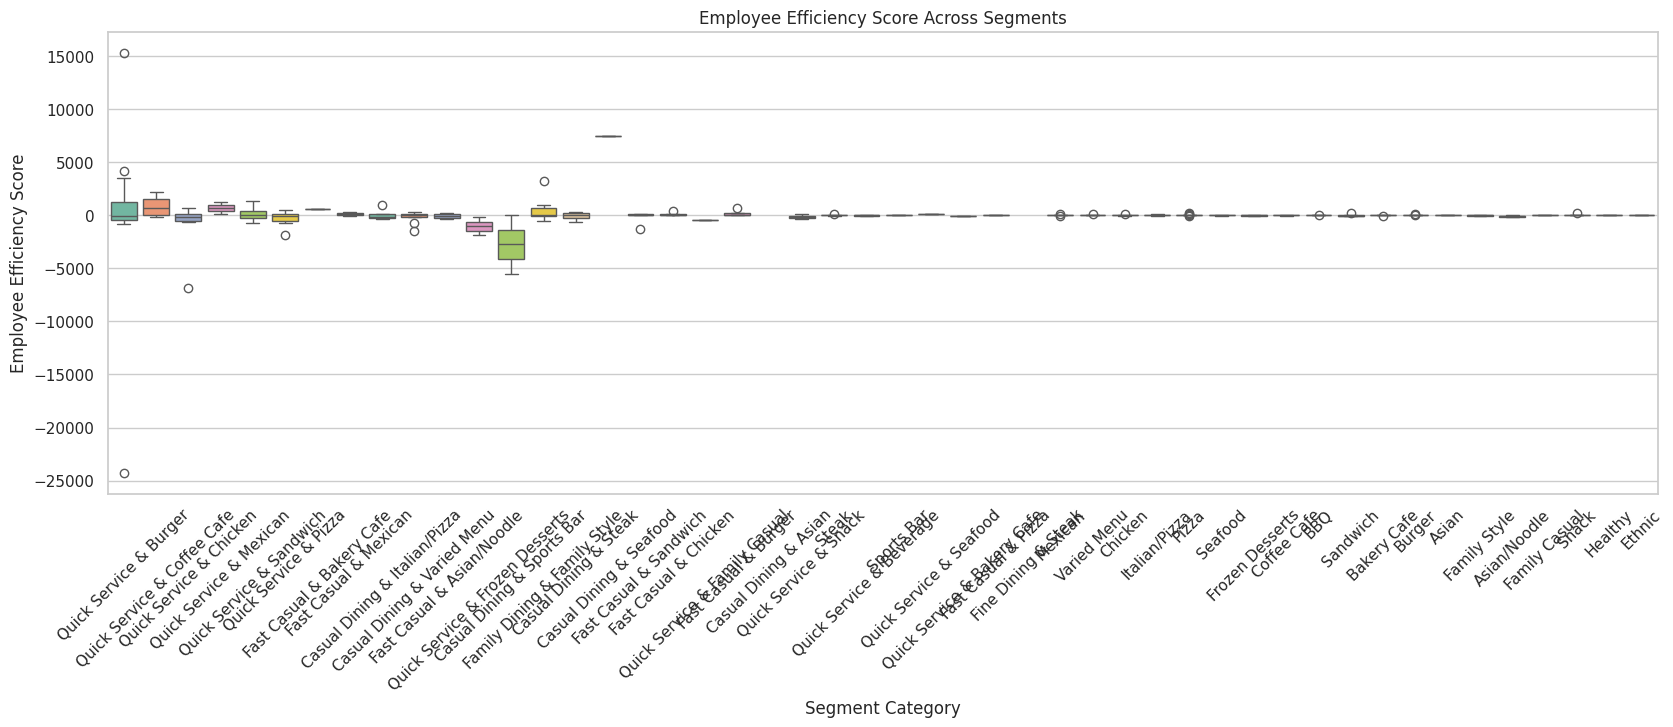

In [29]:
# Plot 8: Employee Efficiency Score Across Segments (Boxplot)
plt.figure(figsize=(20, 6))
sns.boxplot(x="Segment_Category", y="Employee_Efficiency_Score", data=df_cleaned, palette="Set2")
plt.xticks(rotation=45)
plt.title("Employee Efficiency Score Across Segments")
plt.xlabel("Segment Category")
plt.ylabel("Employee Efficiency Score")
plt.show()


<ipython-input-30-8596994501b0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Market_Growth_Contribution", y="Restaurant", data=top_10_growth, palette="coolwarm")


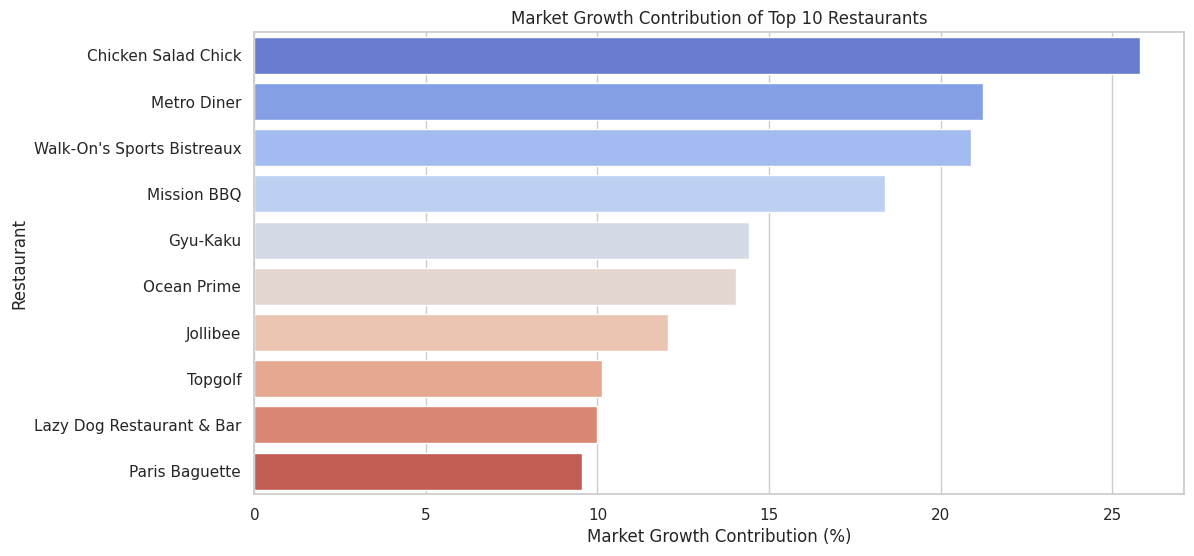

In [30]:
# Top 10 Restaurants based on Market Growth Contribution
top_10_growth = df_cleaned.nlargest(10, "Market_Growth_Contribution")

# Plot 9: Market Growth Contribution of Top 10 Restaurants (Bar Plot)
plt.figure(figsize=(12, 6))
sns.barplot(x="Market_Growth_Contribution", y="Restaurant", data=top_10_growth, palette="coolwarm")
plt.title("Market Growth Contribution of Top 10 Restaurants")
plt.xlabel("Market Growth Contribution (%)")
plt.ylabel("Restaurant")
plt.show()
